## Twitter Tweet Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from textblob import TextBlob

In [12]:
df=pd.read_csv(r'C:\Users\Rishi\OneDrive\Desktop\Genai\Datasets\Tweets.csv')

In [16]:
df['Party'].value_counts()

Party
Republican                 44392
Democrat                   42068
https://t.co/sbSljdw1Zw        1
Name: count, dtype: int64

In [19]:
df.isnull().sum()

Party    0
Tweet    1
dtype: int64

#### Dropping of null values

In [24]:
new_df=df[~df['Tweet'].isnull()]

In [25]:
positive=0
negative=0
neutral=0
polarity=0

In [34]:
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
stopwords = stopwords.words('english')

In [44]:
democrat=new_df[new_df['Party']=="Democrat"]
republican=new_df[new_df['Party']=="Republican"]

In [49]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rishi\AppData\Roaming\nltk_data...


True

In [71]:
democrat_list=[]
for d in democrat.Tweet:
    d=re.sub(r'http\S+', '', d)
    d=re.sub("[^a-zA-Z]", " ", d) 
    d=d.lower()
    d=nltk.word_tokenize(d) 
    d=[word for word in d if not word in set(stopwords)]
    lemma=nlp.WordNetLemmatizer() 
    d=[lemma.lemmatize(word) for word in d]
    d=" ".join(d)
    democrat_list.append(d)

In [72]:
democrat_list[0:5]

['rt chopadvocacy thank repdwightevans cosponsoring child hospital gme support reauthorization act greatl',
 'mission accomplished easy mr president mission incomplete develop long term strate',
 'proof fight savenetneutrality gaining strength netneutrality',
 'last week senator corybooker introduced help student vote act help eliminate challenge voti',
 'fema looking talented youth participate youth preparedness council work fema']

In [73]:
republican_list=[]
for r in republican.Tweet:
    r=re.sub(r'http\S+', '', r)
    r=re.sub("[^a-zA-Z]", " ", r)
    r=r.lower()
    r=nltk.word_tokenize(r)
    r=[word for word in r if not word in set(stopwords)]
    lemma=nlp.WordNetLemmatizer()
    r=[lemma.lemmatize(word) for word in r]
    r=" ".join(r)
    republican_list.append(r)

In [74]:
republican_list[0:5]

['joined manatee educational tv today talk opioids veteran issue check talk coming da',
 'joined transport colleague repesty introduce bipartisan bill combat horror human trafficking gt',
 'rt housegop th congress working hard issue matter family like funding military co',
 'today met cbageorgia talk way supporting community help co',
 'joined michael ball christy kenady servingtogether loudoun county veteran coordinator tom grant p']

In [75]:
democrat_tweets=str(democrat_list).split()
republican_tweets=str(republican_list).split()
democrat_tweets=[word.replace("'","") for word in democrat_tweets ]
democrat_tweets=[word.replace("[", "") for word in democrat_tweets ]
democrat_tweets=[word.replace("]","") for word in democrat_tweets ]
democrat_tweets=[word.replace(",", "") for word in democrat_tweets ]

republican_tweets=[word.replace("'","") for word in republican_tweets ]
republican_tweets=[word.replace("[", "") for word in republican_tweets ]
republican_tweets=[word.replace("]","") for word in republican_tweets ]
republican_tweets=[word.replace(",", "") for word in republican_tweets ]

In [76]:
from nltk.probability import FreqDist
democrat_list_v2 = FreqDist(democrat_tweets)
repub_list_v2=FreqDist(republican_tweets)

In [90]:
democrat_list_v2

FreqDist({'rt': 9088, 'amp': 4830, 'today': 3850, 'trump': 2502, 'u': 2108, 'american': 2053, 'year': 1835, 'thank': 1777, 'family': 1694, 'great': 1676, ...})

In [91]:
repub_list_v2

FreqDist({'rt': 9994, 'today': 4883, 'amp': 4802, 'tax': 2885, 'great': 2876, 'u': 2416, 'house': 2382, 'bill': 2379, 'american': 2241, 'thank': 2118, ...})

#### Freq Counter of words used by democrats and republicans

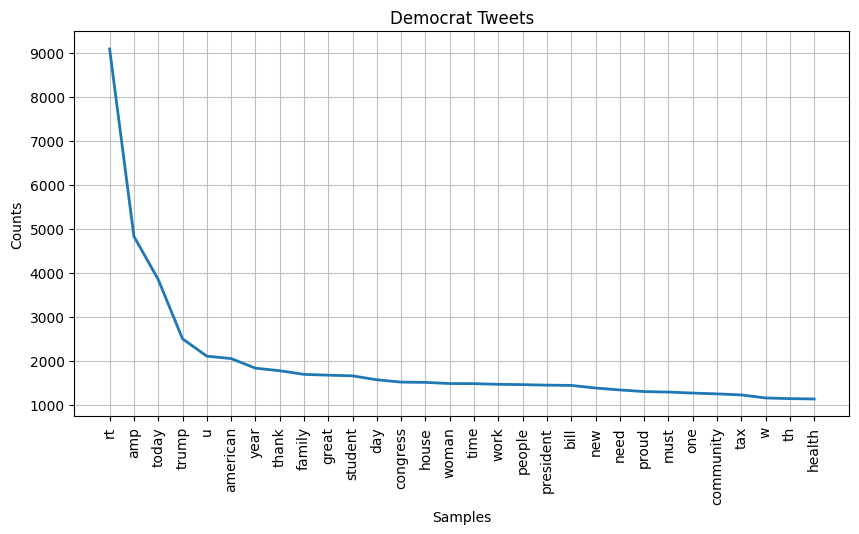

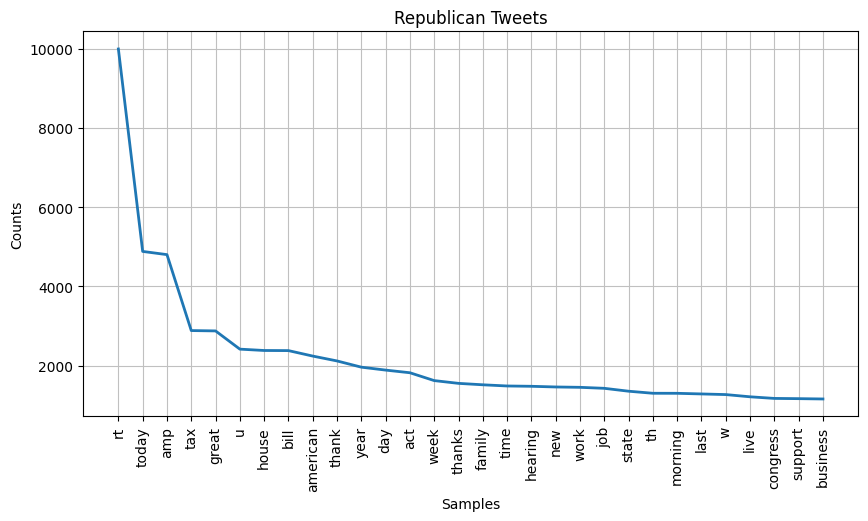

In [95]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
democrat_list_v2.plot(30,title="Democrat Tweets")
plt.subplots(figsize=(10,5))
repub_list_v2.plot(30,title="Republican Tweets")
plt.show()

#### From the above analysis Republicans have a better polarity score as compared to democrats

In [87]:
from textblob import TextBlob
democrat_blob=TextBlob(str(democrat_tweets))
republican_blob=TextBlob(str(republican_tweets))

In [88]:
democrat_blob.sentiment

Sentiment(polarity=0.16429387626634429, subjectivity=0.463833415477823)

In [89]:
republican_blob.sentiment

Sentiment(polarity=0.1978679565229401, subjectivity=0.4585420333029353)

In [97]:
new_df['Party'].value_counts(normalize=True)

Party
Republican    0.51344
Democrat      0.48656
Name: proportion, dtype: float64

#### Distribution of polarities present in parties

In [122]:
neutral=0
positive=0
negative=0

In [123]:
for tweet in democrat_tweets:
    analysis=TextBlob(str(tweet))
    polarity+=analysis.sentiment.polarity

    if(analysis.sentiment.polarity==0):
        neutral+=1
    elif(analysis.sentiment.polarity<0):
        negative+=1
    elif(analysis.sentiment.polarity>0):
        positive+=1

In [125]:
print('Democrats Count')
print(neutral)
print(positive)
print(negative)

Democrats Count
422922
27525
9564


In [127]:
neutral=0
positive=0
negative=0

In [128]:
for tweet in republican_tweets:
    analysis=TextBlob(str(tweet))
    polarity+=analysis.sentiment.polarity

    if(analysis.sentiment.polarity==0):
        neutral+=1
    elif(analysis.sentiment.polarity<0):
        negative+=1
    elif(analysis.sentiment.polarity>0):
        positive+=1

In [129]:
print('Republican Count')
print(neutral)
print(positive)
print(negative)

Republican Count
436153
30921
8740
